In [4]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3x670n_p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3x670n_p
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=ec300fec6e8e1fd13ca83c3887c3e1732f194c7f82e8e5df7476c86edf851d60
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_pnae00/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [2]:
pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.5 MB/s eta 0:00:00


In [6]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

MODEL_TYPE = "vit_b"
CHECKPOINT_PATH = "/content/drive/MyDrive/sam vit /sam_vit_b_01ec64.pth"

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)


mask_generator = SamAutomaticMaskGenerator(sam)

In [17]:
import cv2


# Give the path of your image
IMAGE_PATH= '/content/629de19f83085e483675cfb0c4be6c63.jpg'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Generate segmentation mask
output_mask = mask_generator.generate(image_rgb)
print(output_mask)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 30754, 'bbox': [8, 4, 217, 227], 'predicted_iou': 1.0357451438903809, 'point_coords': [[158.5625, 77.4375]], 'stability_score': 0.9895408153533936, 'crop_box': [0, 0, 236, 236]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 2828, 'bbox': [77, 4, 80, 47], 'predicted_iou': 0.9928781390190125, 'p

In [18]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']),      reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

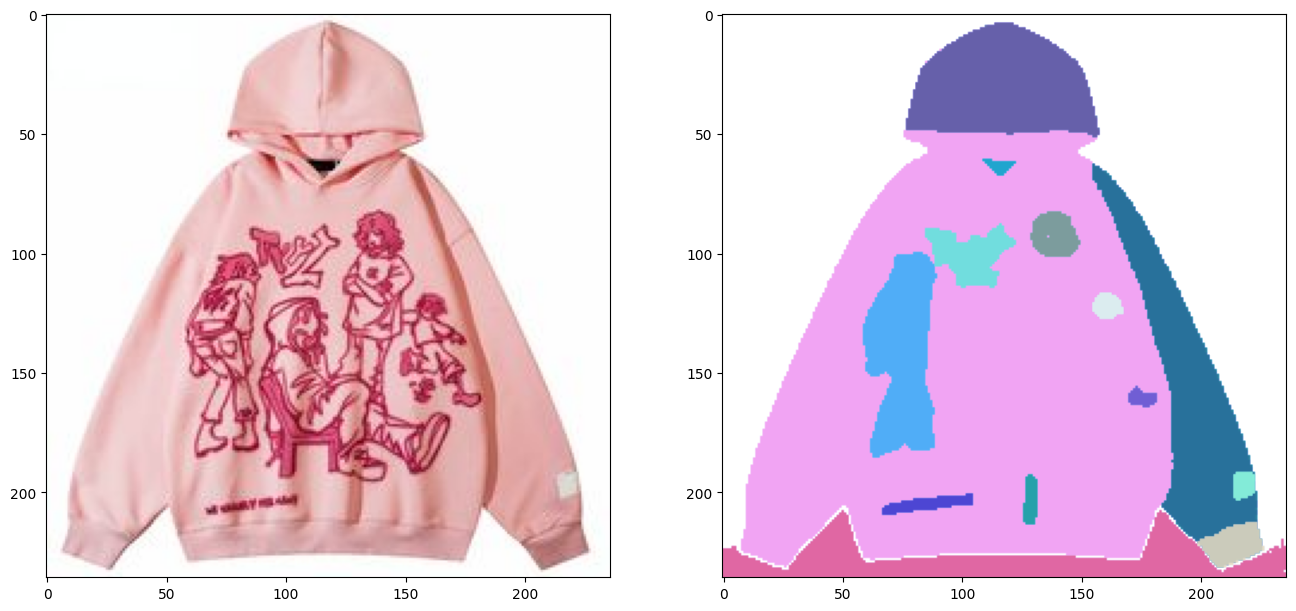

In [19]:
import matplotlib.pyplot as plt
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])

In [10]:
import numpy as np

In [16]:
MODEL_TYPE = "vit_l"
CHECKPOINT_PATH = "/content/drive/MyDrive/sam vit /sam_vit_l_0b3195.pth"

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)


mask_generator = SamAutomaticMaskGenerator(sam)

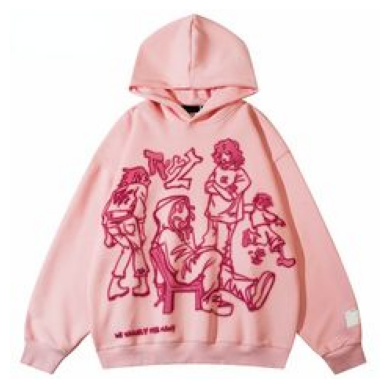

AttributeError: shape

In [21]:
# import torch
# from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
# import matplotlib.pyplot as plt



# Load the image
image_path = "path_to_your_image.jpg"
image = Image.open(IMAGE_PATH).convert("RGB")
plt.imshow(image)
plt.axis('off')
plt.show()

# Define the bounding box [x_min, y_min, x_max, y_max]
bounding_box = [50, 30, 200, 180]

# Initialize the predictor
predictor = SamPredictor(sam)
predictor.set_image(image)

# Predict the mask using the bounding box
masks, scores, _ = predictor.predict_boxes([bounding_box])

# Display the mask
mask = masks[0]
plt.imshow(image)
plt.imshow(mask, alpha=0.5)
plt.axis('off')
plt.show()


Bounding Box: [0, 0, 235, 235]


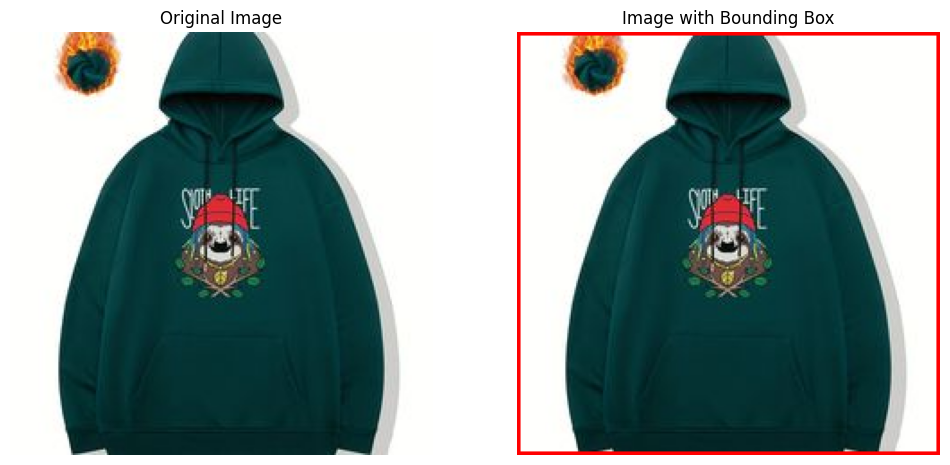

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Load the image
image_path = "/content/4e56d1b5c1287f5e32a3c9679735fed3.jpg"
image = Image.open(image_path).convert("RGB")

# Assuming you have the mask as a numpy array, replace this with your actual mask loading code
# For demonstration, create a binary mask with an object
# mask = np.zeros((image.size[1], image.size[0]), dtype=np.uint8)
# mask[30:70, 40:80] = 1  # Simulate an object

# Load the mask (assuming it's saved as a numpy array file or similar)
# mask = np.load("path_to_your_mask.npy")

# Example mask (for demonstration, replace this with your actual mask)
# The following line should be replaced with the actual mask generation or loading step
mask = np.array(image)[:, :, 0]  # Example mask extraction from one channel

# Find the coordinates of the non-zero values in the mask
non_zero_coords = np.argwhere(mask)

# Calculate the bounding box coordinates
y_min, x_min = np.min(non_zero_coords, axis=0)
y_max, x_max = np.max(non_zero_coords, axis=0)

# Display the bounding box dimensions
bounding_box = [x_min, y_min, x_max, y_max]
print("Bounding Box:", bounding_box)

# Draw bounding box on the image
image_with_box = np.array(image)
cv2.rectangle(image_with_box, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the image and mask with bounding box
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(image_with_box)
ax2.set_title('Image with Bounding Box')
ax2.axis('off')

plt.show()


Bounding Box: [77, 8, 223, 226]


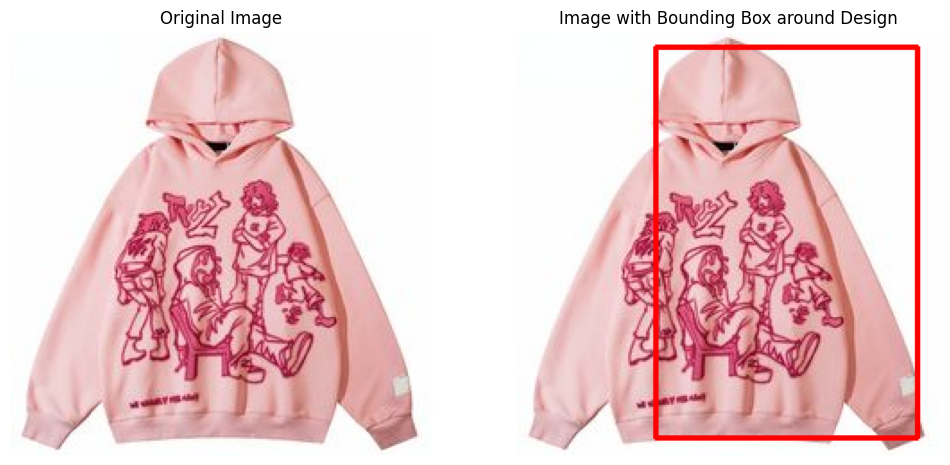

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Load the image
image_path = "/content/629de19f83085e483675cfb0c4be6c63.jpg"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

# Convert the image to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

# Define color range for the design (example values, adjust as needed)
# These values need to be tuned to match the color of the emblem or logo in your image
lower_color = np.array([0, 100, 100])  # Lower bound of the color range
upper_color = np.array([10, 255, 255])  # Upper bound of the color range

# Create a mask for the design based on the color range
design_mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Find the coordinates of the non-zero values in the design mask
non_zero_coords = np.argwhere(design_mask)

# Calculate the bounding box coordinates
y_min, x_min = np.min(non_zero_coords, axis=0)
y_max, x_max = np.max(non_zero_coords, axis=0)

# Display the bounding box dimensions
bounding_box = [x_min, y_min, x_max, y_max]
print("Bounding Box:", bounding_box)

# Draw bounding box on the image
image_with_box = image_np.copy()
cv2.rectangle(image_with_box, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the original image and the image with bounding box
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_np)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(image_with_box)
ax2.set_title('Image with Bounding Box around Design')
ax2.axis('off')

plt.show()


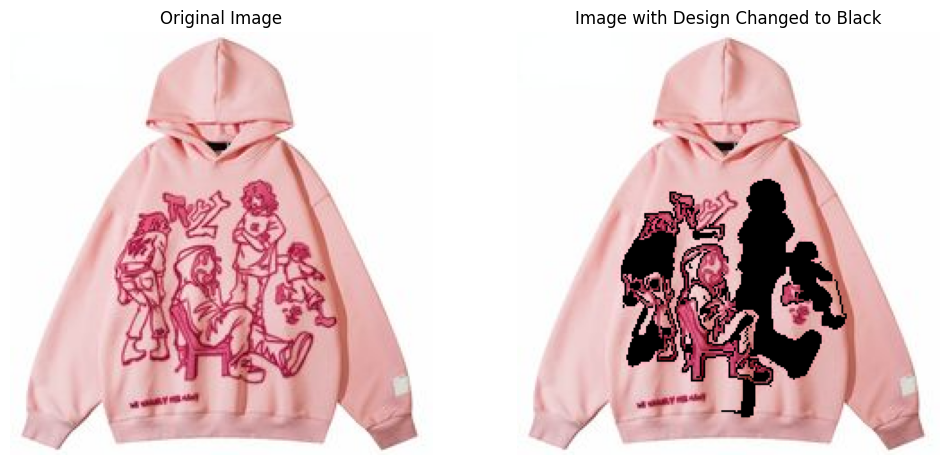

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Load the image
image_path = "/content/629de19f83085e483675cfb0c4be6c63.jpg"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Apply edge detection
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the design
design_mask = np.zeros_like(gray_image)

# Filter contours to find the design
for contour in contours:
    # Filter based on contour area (you may need to adjust the threshold)
    if cv2.contourArea(contour) > 500:
        cv2.drawContours(design_mask, [contour], -1, (255), thickness=cv2.FILLED)

# Change the design color to black
result_image = image_np.copy()
result_image[design_mask == 255] = [0, 0, 0]

# Display the original image and the result image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_np)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(result_image)
ax2.set_title('Image with Design Changed to Black')
ax2.axis('off')

plt.show()


array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [253, 253, 253, ..., 254, 254, 254],
       [253, 253, 253, ..., 254, 254, 254]], dtype=uint8)
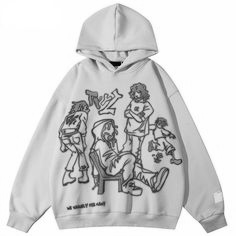

In [28]:
gray_image